# EDA Project

In this notebook, you should perform EDA (Exploratory data analysis) on given dataset: real_estate_dataset.csv

We do not want to give you precise steps to follow, but based on previous lessons, you should have an idea what steps are needed and which should not be skipped. In order to guide you just a bit, here are some ideas:

* it is always good to check how many data are missing - and how can we solve missing data in this dataset?
* what data types have different columns?
* what could be set as index? And does it make sense here?
* price column can be for sure better formated
* can we spot some outliers? What method to see outliers can be used?
* Total area can be in metres (we are in Austria) and numeric, loft size as well
* who is the most active broker?
* what is most sold object type?
* can you do nice visualisation of the data?
* is there a correlation between price and size? Can we see it?
* is there any other patterns to discribe?

## What we want to be submitted:
* send us your notebook on github as link and we will give you feedback
* comment everything - explain your thoughts, why you think this column should be dropped, why you did this visualisation, everything.
* you do not have to follow all ideas above, but your analysis should be going from start to end with logical steps
* try to summarize with at least 3 sentences a conclusion on what we can tell about dataset.

https://towardsdatascience.com/how-to-change-semi-structured-text-into-a-pandas-dataframe-ef531d6baab4
https://medium.com/analytics-vidhya/apartment-market-web-scrapping-and-eda-using-python-a9eacf6d64e2
https://github.com/hw355/eda_realtor/blob/main/EDA_Realtor.ipynb
https://medium.com/web-mining-is688-spring-2021/assignment-1-71368059c638
https://stackoverflow.com/questions/56770982/how-to-split-text-in-one-column-of-pandas-data-frame-to-required-formatthree-co

In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno
%matplotlib inline  
#the output of plotting commands is displayed inline, directly below the code cell that produced it.

In [2]:
#Load dataset
realstate = pd.read_csv("real_estate_dataset.csv")

In [3]:
#Peek into the data. 
print("Contents of the 'head' of Dataframe : ")
realstate.head

Contents of the 'head' of Dataframe : 


<bound method NDFrame.head of                                                     url  \
0     http://www.loopnet.com/Listing/20157634/6060-E...   
1     http://www.loopnet.com/Listing/18499430/1901-A...   
2     http://www.loopnet.com/Listing/20000996/4510-O...   
3     http://www.loopnet.com/Listing/19729524/7645-W...   
4     http://www.loopnet.com/Listing/19535739/171-Mu...   
...                                                 ...   
9071  http://www.loopnet.com/Listing/19833597/316-Br...   
9072  http://www.loopnet.com/Listing/19875908/3005-3...   
9073  http://www.loopnet.com/Listing/19627936/12-Lar...   
9074  http://www.loopnet.com/Listing/20080133/2688-A...   
9075  http://www.loopnet.com/Listing/20003807/1775-G...   

                      Address  \
0       Anchorage, AK 99518 ·   
1       Fairbanks, AK 99701 ·   
2       Anchorage, AK 99502 ·   
3         Wasilla, AK 99654 ·   
4       Anchorage, AK 99504 ·   
...                       ...   
9071  Thermopolis, WY 82443 · 

### I can see the data are troublesome. There a lot of missing information per column in some columns and in others, there is enough information to build new columns tidying up the data. I'll check the names of the columns and the dimension of the data set, to grasp and idea of how much info do I have. 

In [4]:
realstate.columns

Index(['url', 'Address', 'City', 'Owner Name', 'Mailing Address', 'Price',
       'Number of Units', 'Total area', 'Number Of Stories', 'Lot Size',
       'Type', 'Year Built', 'Other Info', 'Images', 'broker', 'phone',
       'EMAIL', 'secondary broker', 'phone, 2', 'Email'],
      dtype='object')

### This dataset is a real state listing. Being as it is, it would be nice to easily extract the information regarding Pricing, location, size, stories, area... I'll see how I can mutate the dataset to sucessfully communicate this information. 

In [5]:
realstate.shape

(9076, 20)

In [6]:
realstate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9076 entries, 0 to 9075
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   url                9076 non-null   object
 1   Address            9076 non-null   object
 2   City               9076 non-null   object
 3   Owner Name         3 non-null      object
 4   Mailing Address    3 non-null      object
 5   Price              9076 non-null   object
 6   Number of Units    9076 non-null   object
 7   Total area         9076 non-null   object
 8   Number Of Stories  9076 non-null   object
 9   Lot Size           9076 non-null   object
 10  Type               9076 non-null   object
 11  Year Built         9076 non-null   object
 12  Other Info         8924 non-null   object
 13  Images             9076 non-null   object
 14  broker             8924 non-null   object
 15  phone              8924 non-null   object
 16  EMAIL              1013 non-null   object


In [7]:
type(realstate)

pandas.core.frame.DataFrame

### dtypes right now it is not useful as everything is an object as I demostrate now, I need to change the types: manually? 

[Text(0.5, 0, 'Variable Type'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Variables Count Across Datatype')]

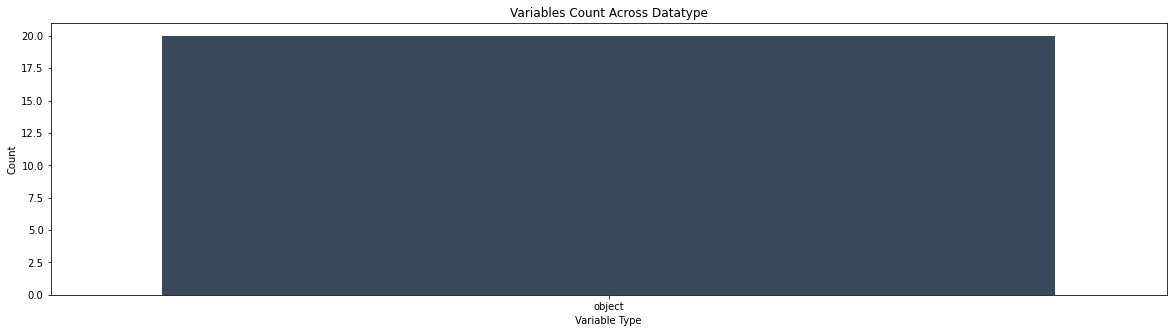

In [8]:
dataTypeDf = pd.DataFrame(realstate.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(20,5)
sns.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax,color="#34495e")
ax.set(xlabel='Variable Type', ylabel='Count',title="Variables Count Across Datatype")

### I think it is more useful to work out the missing values in the first place and then change as necesary. 

## Missing Values... 
From a "first glance" point of view I already saw there are many missing values and data inside each column is not uniformly reported. If I'd like to know What is the percentage of null values per column, i'll need to populate all cells to be able to capture present NaN/Null/Missing values

In order to do this, I'll fill with NaN everywhere there's a missing value. 

In [9]:
#realstatefilled = realstate.fillna(value=np.nan) #https://stackoverflow.com/questions/23743460/replace-none-with-nan-in-pandas-dataframe
realstatefilled = realstate.replace(r'^\s+$', np.nan, regex=True) #https://stackoverflow.com/questions/13445241/replacing-blank-values-white-space-with-nan-in-pandas

In [10]:
realstatefilled.head(5)

,url,Address,City,Owner Name,Mailing Address,Price,Number of Units,Total area,Number Of Stories,Lot Size,Type,Year Built,Other Info,Images,broker,phone,EMAIL,secondary broker,"phone, 2",Email
0,http://www.loopnet.com/Listing/20157634/6060-E...,"Anchorage, AK 99518 ·","6060 Electron Dr., Anchorage, AK, 99518",ODEX INVESTMENTS V LLC,"1001 4TH AVE STE 4500, SEATTLE, WA 98154","$10,239,431",NaN,NaN,NaN,"680,276 SF",Land,NaN,Hard to find large I-2 site located near the c...,http://x.lnimg.com/photo/poster_1920/cf0cb4964...,Greg Johnson,tel:+19075635500,gregory.c.johnson@noaa.gov,NaN,NaN,NaN
1,http://www.loopnet.com/Listing/18499430/1901-A...,"Fairbanks, AK 99701 ·","1901 Airport Way, Fairbanks, AK, 99701",SEATTLE SC PLAZA 2 LLC,"1331 N CALIFORNIA BLVD STE 170, WALNUT CREEK, ...","$4,050,000",NaN,"10,000 SF",1,3.26 AC,Office,2006,Assessor's Parcel Number 0394921 *Sale include...,http://x.lnimg.com/photo/poster_1920/881647c1b...,Pamela Throop,tel:+19074566008,realty@realtyalaska.com,NaN,NaN,NaN
2,http://www.loopnet.com/Listing/20000996/4510-O...,"Anchorage, AK 99502 ·","4510 Old International Airport Rd 99502, Ancho...",NaN,NaN,"$3,500,000",NaN,"28,521 SF",NaN,1.09 AC,Office,NaN,"Three Story Office Building, Lot size 47,265 s...",http://x.lnimg.com/photo/poster_1920/dc70de703...,Vern Flowers,tel:+19073494761,vernonflowers@shaw.ca,NaN,NaN,NaN
3,http://www.loopnet.com/Listing/19729524/7645-W...,"Wasilla, AK 99654 ·","7645 W. Marigold Drive, Wasilla, AK, 99654",BAKE TECHNOLOGY PARK LLC,"550 NEWPORT CENTER DR, NEWPORT BEACH, CA 92660","$3,267,000",NaN,NaN,NaN,25 AC,Land,NaN,"Approximately 25 acres with 1,200+ ft frontage...",http://x.lnimg.com/photo/poster_1920/afd0e7ef8...,"Carl D. Kuhn, CCIM",tel:+19077625887,cdk@gci.net,NaN,NaN,NaN
4,http://www.loopnet.com/Listing/19535739/171-Mu...,"Anchorage, AK 99504 ·","171 Muldoon Rd, Anchorage, AK, 99504",NaN,NaN,"$5,000,000",NaN,NaN,1,"81,893 SF",Retail,1978,SELLER MOTIVATED! PRICE REDUCED TO 5.0M! 6.62%...,http://x.lnimg.com/photo/poster_1920/1f6d47208...,Doosan Bak,tel:+13105288949,ceo@sicilypizza.com,NaN,NaN,NaN


### Great! I'll now proceed to see the percentage of na's on each column

In [11]:
np.round((realstatefilled.isna().sum() / realstatefilled.shape[0]) * 100, 2)

url                   0.00
Address               1.67
City                  0.00
Owner Name           99.97
Mailing Address      99.97
Price                 1.67
Number of Units      93.95
Total area           47.54
Number Of Stories    68.10
Lot Size             11.30
Type                  1.67
Year Built           64.25
Other Info            1.67
Images                2.10
broker                1.67
phone                 1.67
EMAIL                88.84
secondary broker     70.38
phone, 2             70.38
Email                97.50
dtype: float64

### Columns: Owner Name, mailing Address, email, secondary broker, phone, 2 and email (from the second broker, I presume) have a significant amount of null values. I presume that the absence of information doesn't not imply an information loss, as these may be casual. The important information here is the propierties of the pontential property to buy, the broker and the price... 

### The other fields that contain a small percentage of missing values, might not be specially problematic. I have not decide if I will discard the items that don't have info.

### I found about this library that sum up for the NaN values in a visual way, I'll make use of the basic graphs. 

<AxesSubplot:>

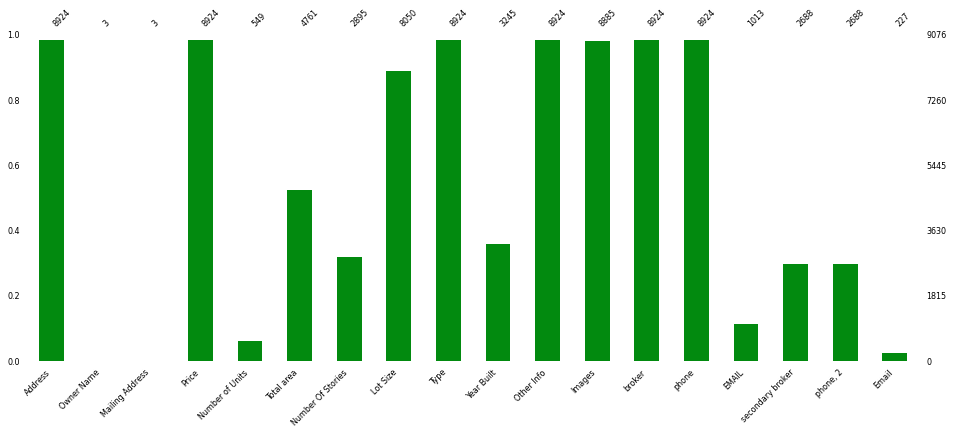

In [12]:
missingValueColumns = realstatefilled.columns[realstatefilled.isnull().any()].tolist() #slicing to plot only the columns that have missing values, 
msno.bar(realstatefilled[missingValueColumns],
         figsize=(16,6),
         color="#028A0F",
         fontsize=8,
         labels=True)
#msno.bar(realstatefilled,
#         figsize=(16,6),
#         color="#028A0F",
#         fontsize=8,
#         labels=True)

In [13]:
#msno.matrix(realstatefilled[missingValueColumns],
#            width_ratios=(10,1),
#            figsize=(16,6),
#            fontsize=8,
#            labels=True)

### The following plot should help to interpret nulity: the heatmap measures nullity correlation: how strongly the presence or absence of one variable affects the presence of another:

Nullity correlation ranges from -1 (if one variable appears the other definitely does not) to 0 (variables appearing or not appearing have no effect on one another) to 1 (if one variable appears the other definitely also does).

Variables that are always full or always empty have no meaningful correlation, and so are silently removed from the visualization—in this case for instance the datetime and injury number columns, which are completely filled, are not included.

<AxesSubplot:>

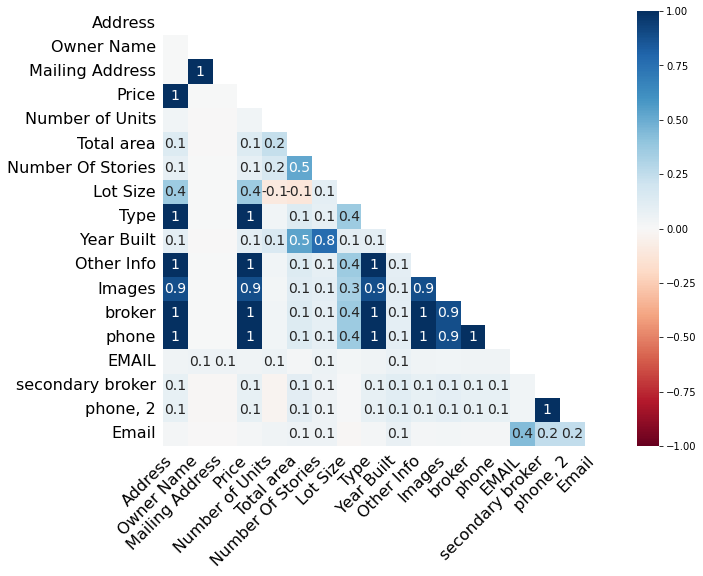

In [14]:
msno.heatmap(realstatefilled,figsize=(10,8))

### Let's take Type of property, basically, it's completness is closely related to complete data regarding Address and Price.On the contrary, when the attribute Lot Size is missing, then in some cases Number of Units and Total Area is present. 

In [15]:
#np.round((realstatefilled.isna().sum() / realstatefilled.shape[0]) * 100, 2)
#np.round((realstate.isna().sum() / realstate.shape[0]) * 100, 2)

In [16]:
# Delete columns containing either 70% or more than that NaN Values  ##IT IS ALSO POSSIBLE TO DROP COLUMNS, THE WAY YOU TEACHED US.
perc = 70.0
min_count =  int(((100-perc)/100)*realstatefilled.shape[0] + 1)
mod_df = realstatefilled.dropna( axis=1, 
                thresh=min_count)
print("Modified Dataframe : ")
print(mod_df.head(5))
mod_df_shape = str(mod_df.shape)
print("The shape of data frame %s:" %(mod_df_shape))

Modified Dataframe : 
                                                 url                Address  \
0  http://www.loopnet.com/Listing/20157634/6060-E...  Anchorage, AK 99518 ·   
1  http://www.loopnet.com/Listing/18499430/1901-A...  Fairbanks, AK 99701 ·   
2  http://www.loopnet.com/Listing/20000996/4510-O...  Anchorage, AK 99502 ·   
3  http://www.loopnet.com/Listing/19729524/7645-W...    Wasilla, AK 99654 ·   
4  http://www.loopnet.com/Listing/19535739/171-Mu...  Anchorage, AK 99504 ·   

                                                City        Price Total area  \
0            6060 Electron Dr., Anchorage, AK, 99518  $10,239,431        NaN   
1             1901 Airport Way, Fairbanks, AK, 99701   $4,050,000  10,000 SF   
2  4510 Old International Airport Rd 99502, Ancho...   $3,500,000  28,521 SF   
3         7645 W. Marigold Drive, Wasilla, AK, 99654   $3,267,000        NaN   
4               171 Muldoon Rd, Anchorage, AK, 99504   $5,000,000        NaN   

  Number Of Stories   

### I've deleted 7 columns. 

In [17]:
np.round((mod_df.isna().sum() / mod_df.shape[0]) * 100, 2)

url                   0.00
Address               1.67
City                  0.00
Price                 1.67
Total area           47.54
Number Of Stories    68.10
Lot Size             11.30
Type                  1.67
Year Built           64.25
Other Info            1.67
Images                2.10
broker                1.67
phone                 1.67
dtype: float64

### I still have an important amount of columns that have NA values. For instance, Total area, number of stories and year built. If the dataset will serve to predict prices, i'll need to decide whether to keep those and engieener them or drop the information. I presume it's wise to drop the ones that have more than 50% of missing values. 

In [18]:
perc = 50.0
min_count =  int(((100-perc)/100)*mod_df.shape[0] + 1)
mod_df = mod_df.dropna( axis=1, 
                thresh=min_count)
print("Modified Dataframe : ")
print(mod_df.head(5))
mod_df_shape = str(mod_df.shape)
print("The shape of data frame %s:" %(mod_df_shape))

Modified Dataframe : 
                                                 url                Address  \
0  http://www.loopnet.com/Listing/20157634/6060-E...  Anchorage, AK 99518 ·   
1  http://www.loopnet.com/Listing/18499430/1901-A...  Fairbanks, AK 99701 ·   
2  http://www.loopnet.com/Listing/20000996/4510-O...  Anchorage, AK 99502 ·   
3  http://www.loopnet.com/Listing/19729524/7645-W...    Wasilla, AK 99654 ·   
4  http://www.loopnet.com/Listing/19535739/171-Mu...  Anchorage, AK 99504 ·   

                                                City        Price Total area  \
0            6060 Electron Dr., Anchorage, AK, 99518  $10,239,431        NaN   
1             1901 Airport Way, Fairbanks, AK, 99701   $4,050,000  10,000 SF   
2  4510 Old International Airport Rd 99502, Ancho...   $3,500,000  28,521 SF   
3         7645 W. Marigold Drive, Wasilla, AK, 99654   $3,267,000        NaN   
4               171 Muldoon Rd, Anchorage, AK, 99504   $5,000,000        NaN   

     Lot Size    Type 

In [19]:
np.round((mod_df.isna().sum() / mod_df.shape[0]) * 100, 2)

url            0.00
Address        1.67
City           0.00
Price          1.67
Total area    47.54
Lot Size      11.30
Type           1.67
Other Info     1.67
Images         2.10
broker         1.67
phone          1.67
dtype: float64

### I've deleted 2 further columns. 

In [20]:
#realstate.describe()
mod_df.describe()

,url,Address,City,Price,Total area,Lot Size,Type,Other Info,Images,broker,phone
count,9076,8924,9076,8924,4761,8050,8924,8924,8885,8924,8924
unique,9076,5030,8812,3543,3490,4600,12,8703,8872,5370,5034
top,http://www.loopnet.com/Listing/20157634/6060-E...,"Cheyenne, WY 82001 ·",Access Denied\nAccess Denied\nYou are in breac...,"$3,500,000","30,000 SF",5 AC,Land,"""",http://x.lnimg.com/photo/thumb_288/f5002b58e50...,Glen Kunofsky,tel:+12124305115
freq,1,21,152,290,42,50,3232,44,4,67,67


### I just catched that in the city column, the top most frequent string is "Access Denied", I supposed this is due to the web scrapping in place to get the information from a webpage, which is repeated 152 times. Other curiosities: The top broker has 67 propierties on sale. I am already thinking that the indexes could be the names of the sellers or, to partition the information into Postal Codes, Cities... 
### The funny part is that the method describe() only works for numeric values... and its throwing something in non numeric...

### Continue dealing with missing data from the Price column

In [21]:
#print(realstate.iloc[32:42, 1:11 ])
print(mod_df.iloc[32:42, 1:11 ])

                   Address                                               City  \
32  Montgomery, AL 36108 ·              US Hwy 80 West, Montgomery, AL, 36108   
33      Mobile, AL 36617 ·             2306 St Stephens Rd, Mobile, AL, 36617   
34      Tanner, AL 35671 ·               5271 Endeavor Way, Tanner, AL, 35671   
35      Mobile, AL 36606 ·  I-65 Service Road at Airport Boulevard, Mobile...   
36    Homewood, AL 35209 ·  209, 225, 234, 237 & 240 Oxmoor Circle, Homewo...   
37      Mobile, AL 36606 ·            100 Springdale Blvd., Mobile, AL, 36606   
38  Huntsville, AL 35671 ·           5323 Endeavor Way, Huntsville, AL, 35671   
39   Pike Road, AL 36064 ·                9916 Troy Hwy, Pike Road, AL, 36064   
40    Saraland, AL 36571 ·               1130 Joaneen Dr, Saraland, AL, 36571   
41       Comer, AL 36053 ·           Bishop Hill Plantation, Comer, AL, 36053   

                    Price  Total area       Lot Size           Type  \
32             $8,750,000         NaN

In [22]:
#realstate[realstate.columns[6]] = realstate[realstate.columns[6]].replace('[\$,]', '', regex=True)
mod_df['Price'] = pd.to_numeric(mod_df['Price'].replace('[^0-9\.-]','', regex = True))  #THIS IS HOW I FOUND I HAVE RANGES, THAT IS WHY I KEEP IT
#realstate['Price'].describe()
#realstate['Price'].describe().apply(lambda x: format(x, 'f'))

ValueError: Unable to parse string "613200-8500000" at position 39

In [23]:
#I tried this, but was not sucesfull

#mod_df['Price_norange'] = pd.to_numeric(mod_df['Price'].replace('[^0-9\.-]','', regex = True))
#https://stackoverflow.com/questions/69613848/choosing-values-from-pandas-column-with-the-lowest-valuea
#mod_df['Prices_norange'] = (mod_df['Price'].str.extractall('(\d+\.\d+|\d+)')[0]
#o                            .astype(float)
#o                            .groupby(level=0)
#o                            .min())
#print(mod_df.iloc[32:42, 1:12 ])
#mod_df['Price'].str.findall(r'(?:\d+,)*\d+,\d+').to_frame()
#mod_df['Pricejustnumber'] = mod_df['Price'].str.findall(r'(?:\d+,)*\d+,\d+')
#mod_df['Pricenoranges'] = mod_df['Price'].str.split('-')
#mod_df.head()

In [24]:
mod_df = mod_df[~mod_df.Price.str.contains(" - ", na=False)]
mod_df_shape = str(mod_df.shape)
print("The shape of data frame %s:" %(mod_df_shape))

The shape of data frame (8736, 11):


In [25]:
print(mod_df.iloc[32:42, 3:13 ])

          Price  Total area      Lot Size           Type  \
32   $8,750,000         NaN        350 AC           Land   
33   $3,800,000         NaN       4.81 AC         Retail   
34  $15,514,000  327,600 SF  1,132,560 SF     Industrial   
35   $4,965,840         NaN       9.50 AC           Land   
36   $7,400,000  142,040 SF       8.43 AC     Industrial   
37   $3,267,000         NaN          5 AC           Land   
38  $11,934,700  252,000 SF      19.15 AC     Industrial   
40   $3,990,000   30,000 SF     60,750 SF  Hotel & Motel   
41   $5,172,000         NaN      1,730 AC           Land   
42   $6,550,376   47,287 SF       7.84 AC         Retail   

                                           Other Info  \
32  350 Acres in International Trade Zone. Sewer a...   
33  As exclusive broker, Cushman & Wakefield is pl...   
34  Prime Warehouse/Manufacturing building conveni...   
35  9.5 acres of prime property (600 approx. feet ...   
36  Oxmoor Commons, which consists of five office/... 

In [26]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8736 entries, 0 to 9075
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   url         8736 non-null   object
 1   Address     8584 non-null   object
 2   City        8736 non-null   object
 3   Price       8584 non-null   object
 4   Total area  4739 non-null   object
 5   Lot Size    7721 non-null   object
 6   Type        8584 non-null   object
 7   Other Info  8584 non-null   object
 8   Images      8545 non-null   object
 9   broker      8584 non-null   object
 10  phone       8584 non-null   object
dtypes: object(11)
memory usage: 819.0+ KB


In [27]:
mod_df['Mod_Price'] = pd.to_numeric(mod_df['Price'].replace('[^0-9\.-]','', regex = True))

 ### I don't understand the warning that is throwing. The error stopped when I modified for mod_df['Mod_Price']. I think the problem is to try to change in place the column. 

In [28]:
mod_df['Mod_Price'].describe()

count    8.560000e+03
mean     5.925520e+06
std      5.663657e+06
min      1.220000e+03
25%      3.413655e+06
50%      4.500000e+06
75%      6.570888e+06
max      9.116890e+07
Name: Mod_Price, dtype: float64

In [29]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8736 entries, 0 to 9075
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   url         8736 non-null   object 
 1   Address     8584 non-null   object 
 2   City        8736 non-null   object 
 3   Price       8584 non-null   object 
 4   Total area  4739 non-null   object 
 5   Lot Size    7721 non-null   object 
 6   Type        8584 non-null   object 
 7   Other Info  8584 non-null   object 
 8   Images      8545 non-null   object 
 9   broker      8584 non-null   object 
 10  phone       8584 non-null   object 
 11  Mod_Price   8560 non-null   float64
dtypes: float64(1), object(11)
memory usage: 887.2+ KB


In [30]:
print(mod_df.index)

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            9066, 9067, 9068, 9069, 9070, 9071, 9072, 9073, 9074, 9075],
           dtype='int64', length=8736)


In [31]:
##mod_df.reset_index(drop=True) 
### HOW WOULD THIS BE USEFUL???

In [32]:
mod_df.shape

(8736, 12)

In [33]:
mod_df.head()

,url,Address,City,Price,Total area,Lot Size,Type,Other Info,Images,broker,phone,Mod_Price
0,http://www.loopnet.com/Listing/20157634/6060-E...,"Anchorage, AK 99518 ·","6060 Electron Dr., Anchorage, AK, 99518","$10,239,431",NaN,"680,276 SF",Land,Hard to find large I-2 site located near the c...,http://x.lnimg.com/photo/poster_1920/cf0cb4964...,Greg Johnson,tel:+19075635500,10239431.0
1,http://www.loopnet.com/Listing/18499430/1901-A...,"Fairbanks, AK 99701 ·","1901 Airport Way, Fairbanks, AK, 99701","$4,050,000","10,000 SF",3.26 AC,Office,Assessor's Parcel Number 0394921 *Sale include...,http://x.lnimg.com/photo/poster_1920/881647c1b...,Pamela Throop,tel:+19074566008,4050000.0
2,http://www.loopnet.com/Listing/20000996/4510-O...,"Anchorage, AK 99502 ·","4510 Old International Airport Rd 99502, Ancho...","$3,500,000","28,521 SF",1.09 AC,Office,"Three Story Office Building, Lot size 47,265 s...",http://x.lnimg.com/photo/poster_1920/dc70de703...,Vern Flowers,tel:+19073494761,3500000.0
3,http://www.loopnet.com/Listing/19729524/7645-W...,"Wasilla, AK 99654 ·","7645 W. Marigold Drive, Wasilla, AK, 99654","$3,267,000",NaN,25 AC,Land,"Approximately 25 acres with 1,200+ ft frontage...",http://x.lnimg.com/photo/poster_1920/afd0e7ef8...,"Carl D. Kuhn, CCIM",tel:+19077625887,3267000.0
4,http://www.loopnet.com/Listing/19535739/171-Mu...,"Anchorage, AK 99504 ·","171 Muldoon Rd, Anchorage, AK, 99504","$5,000,000",NaN,"81,893 SF",Retail,SELLER MOTIVATED! PRICE REDUCED TO 5.0M! 6.62%...,http://x.lnimg.com/photo/poster_1920/1f6d47208...,Doosan Bak,tel:+13105288949,5000000.0


### There are several ways to change the type of column. I don't know which would be the most "pythonic" way of doing it... For areas, I'll try the following.

### I am begining with TOTAL AREA since it has 47% of NA values. I'll just try to change to numeric type. I found it works, because the types remain float, that means I only had Square Feet values... I'll deal with the changing of the units with lot Size and I'll do arrangements for Total area, but Still, I need to consider almost half of the information is missing

In [34]:
#One way... haven't tried.
#mod_df_2['Lot Size'] = mod_df_2['Lot size'].astype(int)
#mod_df_2['Lot Size'].describe().apply(lambda x: format(x, 'f'))

#mod_df_2['Total area'] = mod_df_2['Total area'].str.replace(' SF', '').apply(pd.to_numeric) ###Throws errors because of "."
#mod_df_2['Total area'] = mod_df_2['Total area'].str.replace(',', '.')
mod_df['Mod_Total area'] = mod_df['Total area'].str.replace(' SF', '')
mod_df['Mod_Total area'] = mod_df['Mod_Total area'].str.replace(',', '').astype(float)
print(mod_df['Mod_Total area'].head())
print(mod_df['Mod_Total area'].describe())

0        NaN
1    10000.0
2    28521.0
3        NaN
4        NaN
Name: Mod_Total area, dtype: float64
count    4.739000e+03
mean     5.528019e+04
std      1.070187e+05
min      0.000000e+00
25%      1.070000e+04
50%      2.784800e+04
75%      6.000000e+04
max      3.495000e+06
Name: Mod_Total area, dtype: float64


### Following the link, I found useful to use a dictionary to map what to do, depending on the type of unit used. Also, for some reason, in this way, it works my finding an average if there is a range... so I didnt have to get rid of ranges, as in the last part. 
https://stackoverflow.com/questions/71582835/convert-different-units-of-a-column-in-pandas

In [35]:
d = {'SF': 0.9305, 'AC':4047}

mod_df['avg_LotSize'] = (mod_df['Lot Size'].str.extractall(r'(\d+\.*\d*)')
                             .astype(float)
                             .groupby(level=0)
                             .mean())

mod_df['unit_LotSize'] = mod_df['Lot Size'].str.extract(f'({"|".join(d)})', expand=False)

mod_df['map'] = mod_df['unit_LotSize'].map(d).fillna(1)

mod_df['total_LotSize_m2'] = mod_df['avg_LotSize'].mul(mod_df['map'])
print (mod_df.head())

                                                 url                Address  \
0  http://www.loopnet.com/Listing/20157634/6060-E...  Anchorage, AK 99518 ·   
1  http://www.loopnet.com/Listing/18499430/1901-A...  Fairbanks, AK 99701 ·   
2  http://www.loopnet.com/Listing/20000996/4510-O...  Anchorage, AK 99502 ·   
3  http://www.loopnet.com/Listing/19729524/7645-W...    Wasilla, AK 99654 ·   
4  http://www.loopnet.com/Listing/19535739/171-Mu...  Anchorage, AK 99504 ·   

                                                City        Price Total area  \
0            6060 Electron Dr., Anchorage, AK, 99518  $10,239,431        NaN   
1             1901 Airport Way, Fairbanks, AK, 99701   $4,050,000  10,000 SF   
2  4510 Old International Airport Rd 99502, Ancho...   $3,500,000  28,521 SF   
3         7645 W. Marigold Drive, Wasilla, AK, 99654   $3,267,000        NaN   
4               171 Muldoon Rd, Anchorage, AK, 99504   $5,000,000        NaN   

     Lot Size    Type                       

In [36]:
### NOT USEFUL: https://stackoverflow.com/questions/6116978/how-to-replace-multiple-substrings-of-a-string
#def replace_all(text, dic):
#    for i, j in dic.iteritems():
#        text = text.replace(i, j)
#    return text
#d = { 'cat': '', 'AC': ''}
#my_sentence = "This is my cat and this is my dog."
#replace_all(my_sentence, d)
#print(my_sentence)

##https://stackoverflow.com/questions/46342492/use-dictionary-to-replace-a-string-within-a-string-in-pandas-columns
###This works really nice, but it's not useful since I'll need to change the unit values... 
#ids = {'AREA':['SF','AC'],
#      'AREA2':['','']}
#ids = dict(zip(ids['AREA'], ids['AREA2']))
#print (ids)
#mod_df_2['Lot Size'] = mod_df_2['Lot Size'].replace(ids, regex=True)
#mod_df_2['Lot Size'] = mod_df_2['Lot Size'].str.replace(',', '').astype(float)
#print(mod_df_2['Lot Size'].describe)

In [37]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8736 entries, 0 to 9075
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               8736 non-null   object 
 1   Address           8584 non-null   object 
 2   City              8736 non-null   object 
 3   Price             8584 non-null   object 
 4   Total area        4739 non-null   object 
 5   Lot Size          7721 non-null   object 
 6   Type              8584 non-null   object 
 7   Other Info        8584 non-null   object 
 8   Images            8545 non-null   object 
 9   broker            8584 non-null   object 
 10  phone             8584 non-null   object 
 11  Mod_Price         8560 non-null   float64
 12  Mod_Total area    4739 non-null   float64
 13  avg_LotSize       7720 non-null   float64
 14  unit_LotSize      7720 non-null   object 
 15  map               8736 non-null   float64
 16  total_LotSize_m2  7720 non-null   float64


In [38]:
d = {'SF': 0.9305}

mod_df['avg_Totalarea'] = (mod_df['Total area'].str.extractall(r'(\d+\.*\d*)')
                             .astype(float)
                             .groupby(level=0)
                             .mean())

mod_df['unit_Totalarea'] = mod_df['Total area'].str.extract(f'({"|".join(d)})', expand=False)

mod_df['map_area'] = mod_df['unit_Totalarea'].map(d).fillna(1)

mod_df['total_area_m2'] = mod_df['avg_Totalarea'].mul(mod_df['map_area'])
print (mod_df.head())

                                                 url                Address  \
0  http://www.loopnet.com/Listing/20157634/6060-E...  Anchorage, AK 99518 ·   
1  http://www.loopnet.com/Listing/18499430/1901-A...  Fairbanks, AK 99701 ·   
2  http://www.loopnet.com/Listing/20000996/4510-O...  Anchorage, AK 99502 ·   
3  http://www.loopnet.com/Listing/19729524/7645-W...    Wasilla, AK 99654 ·   
4  http://www.loopnet.com/Listing/19535739/171-Mu...  Anchorage, AK 99504 ·   

                                                City        Price Total area  \
0            6060 Electron Dr., Anchorage, AK, 99518  $10,239,431        NaN   
1             1901 Airport Way, Fairbanks, AK, 99701   $4,050,000  10,000 SF   
2  4510 Old International Airport Rd 99502, Ancho...   $3,500,000  28,521 SF   
3         7645 W. Marigold Drive, Wasilla, AK, 99654   $3,267,000        NaN   
4               171 Muldoon Rd, Anchorage, AK, 99504   $5,000,000        NaN   

     Lot Size    Type                       

#mod_df_2['size(sqft)'] = mod_df_2['size(sqft)'].astype(int)
#mod_df_2['size(sqft)'].describe().apply(lambda x: format(x, 'f'))
#mod_df_2['longitude'] = mod_df_2['longitude'].astype(float)
#mod_df_2['latitude'] = mod_df_2['latitude'].astype(float)
#mod_df_2['last_update'] = pd.to_datetime(mod_df_2['last_update'], format='%Y-%m-%dT%H:%M:%SZ', errors='coerce')

mod_df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

In [39]:
mod_df.describe()

,Mod_Price,Mod_Total area,avg_LotSize,map,total_LotSize_m2,avg_Totalarea,map_area,total_area_m2
count,8.560000e+03,4.739000e+03,7720.000000,8736.000000,7.720000e+03,4739.000000,8736.000000,4739.000000
mean,5.925520e+06,5.528019e+04,90.277981,2701.560292,1.426908e+05,226.924597,0.962298,211.153338
std,5.663657e+06,1.070187e+05,150.606048,1906.283774,3.844542e+05,164.184950,0.034626,152.774096
min,1.220000e+03,0.000000e+00,0.010000,0.930500,1.581850e-01,0.000000,0.930500,0.000000
25%,3.413655e+06,1.070000e+04,3.757500,1.000000,8.476955e+02,73.250000,0.930500,68.159125
50%,4.500000e+06,2.784800e+04,15.000000,4047.000000,1.821150e+04,218.000000,0.930500,202.849000
75%,6.570888e+06,6.000000e+04,101.557500,4047.000000,8.498700e+04,360.250000,1.000000,335.212625
max,9.116890e+07,3.495000e+06,998.000000,4047.000000,4.038906e+06,999.000000,1.000000,929.569500


Index(['Mod_Price', 'Mod_Total area', 'avg_LotSize', 'map', 'total_LotSize_m2',
       'avg_Totalarea', 'map_area', 'total_area_m2'],
      dtype='object')


/mnt/Files/pyladies_vienna_data_course/pyladiesenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


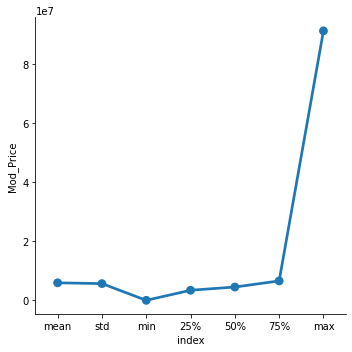

/mnt/Files/pyladies_vienna_data_course/pyladiesenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


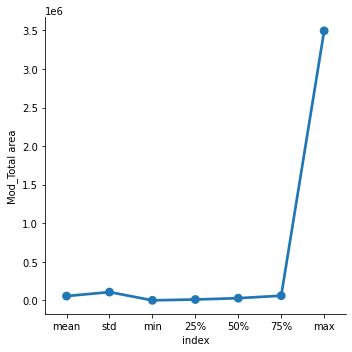

/mnt/Files/pyladies_vienna_data_course/pyladiesenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


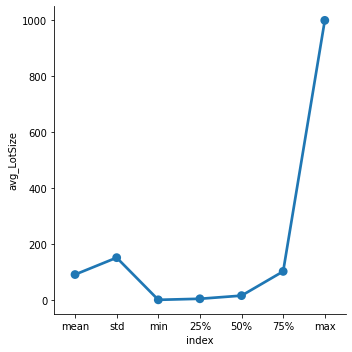

/mnt/Files/pyladies_vienna_data_course/pyladiesenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


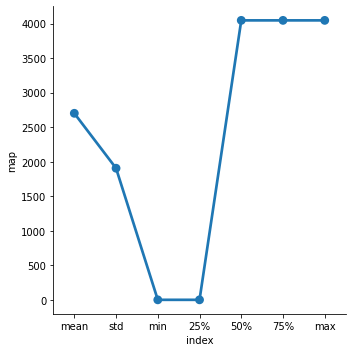

/mnt/Files/pyladies_vienna_data_course/pyladiesenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


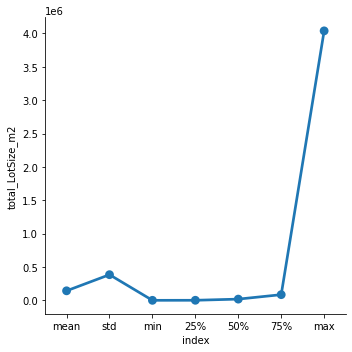

/mnt/Files/pyladies_vienna_data_course/pyladiesenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


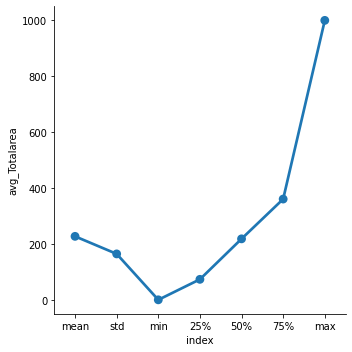

/mnt/Files/pyladies_vienna_data_course/pyladiesenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


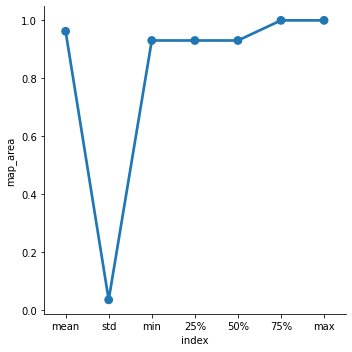

/mnt/Files/pyladies_vienna_data_course/pyladiesenv/lib/python3.7/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


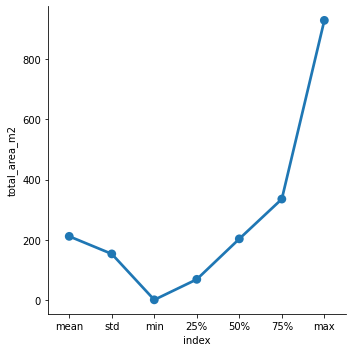

In [55]:
#describe_num_df = mod_df.describe(include=['float64'])
describe_num_df = mod_df.describe()
describe_num_df.reset_index(inplace=True)
num_col = mod_df._get_numeric_data().columns
print(num_col)
type(num_col)
num_col.drop(['Mod_Total area', 'avg_LotSize', 'map','avg_Totalarea', 'map_area'])

# To remove any variable from plot
describe_num_df = describe_num_df[describe_num_df['index'] != 'count']
for i in num_col:  
    if i in ['index']:    
        continue  
    sns.factorplot(x='index', y=i, data=describe_num_df)  
    plt.show()

In [ ]:
#https://stackoverflow.com/questions/56770982/how-to-split-text-in-one-column-of-pandas-data-frame-to-required-formatthree-co

In [ ]:
#https://pandas.pydata.org/docs/user_guide/groupby.html
####https://pandas.pydata.org/docs/user_guide/groupby.html ## Split, apply, combine

https://stackoverflow.com/questions/56770982/how-to-split-text-in-one-column-of-pandas-data-frame-to-required-formatthree-co### Images and URL lead to a web page. 
I've been researching about it and I could apply an easy and fast way to see if the webpage is available,
with the package webbrowswer


In [ ]:
## import webbrowser
## url_1 = realstate.url[0]
## webbrowser.open_new_tab(url_1)

ages = ['Age 96 - 97', 'Age greater than 99', '65-74 years old', '75+ years old']
df = pd.DataFrame({'age': ages})

df[['age_low', 'age_high']] = df['age'].str.extract(r'(\d+)(?:\D+(\d+))?')
print(df)

#### Try r'(\d+)(?:[\s-]*(\d+))?' or r'(\d+)[\s-]*(\d*)' – 

In [ ]:
from datetime import datetime
# Pongo bien la fecha
data['x'] = [datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S') for x in data['x']]
data['x'] = pd.to_datetime(data['x'])

data.head()

In [45]:
mod_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8736 entries, 0 to 9075
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               8736 non-null   object 
 1   Address           8584 non-null   object 
 2   City              8736 non-null   object 
 3   Price             8584 non-null   object 
 4   Total area        4739 non-null   object 
 5   Lot Size          7721 non-null   object 
 6   Type              8584 non-null   object 
 7   Other Info        8584 non-null   object 
 8   Images            8545 non-null   object 
 9   broker            8584 non-null   object 
 10  phone             8584 non-null   object 
 11  Mod_Price         8560 non-null   float64
 12  Mod_Total area    4739 non-null   float64
 13  avg_LotSize       7720 non-null   float64
 14  unit_LotSize      7720 non-null   object 
 15  map               8736 non-null   float64
 16  total_LotSize_m2  7720 non-null   float64


<AxesSubplot:xlabel='Mod_Price'>

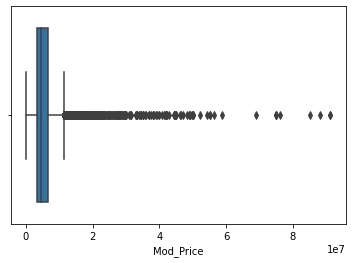

In [43]:
#Boxplot - price
sns.boxplot(x = mod_df['Mod_Price']) #There are a lot of outliers

In [39]:
mod_df['broker'].nunique()

5238

In [ ]:
mod_df.groupby(['City','total_LotSize_m2','Pclass']).size()

### Type, broker, place seem like correct attributes to organize the data around. Statistics about those should be interesting, the intersection between them and Price, Are, Year built are key info

In [ ]:
#https://www.w3resource.com/python-exercises/python-basic-exercise-61.php
d_ft = int(input("Input distance in feet: "))
d_inches = d_ft * 12
d_yards = d_ft / 3.0
d_miles = d_ft / 5280.0


df.loc[df.Weight == "155", "Name"] = "John"

###https://www.geeksforgeeks.org/python-pandas-series-str-find/
##https://www.shanelynn.ie/pandas-iloc-loc-select-rows-and-columns-dataframe/
  
# dropping null value columns to avoid errors
data.dropna(inplace = True)
 
# substring to be searched
sub ='a'
 
# creating and passing series to new column
data["Indexes"]= data["Name"].str.find(sub)
 
# display
data